![Humble Bumble Hero](./images/bumble.gif)

# Humble Bumble Data Analyst Interview Challenge 🐝🍯
## Bumble   Data Analyst Interview Challenge using Python, Pandas, and Matplotlib 🐝🍯


![Bumble Question 1](./images/bumble_Q1.gif)
# Question 1:


Please complete the below shell function so that,  given a string s, it will count the number of unique words, 
which is case insensitive and ignores punctuation. 

* The answer should be printed, and should be printed in alphabetical
order. 

* No libraries outside of the python standard 
libraries can be used (ie, no pandas, no sklearn, no nltk etc).


# Example:

### "I'm smart, I'm educated. It would have been a disservice to every woman to go away or hide." - Whitney Wolfe Founder of Bumble

------
```Input: "I'm smart I'm educated. It would have been a disservice to every woman to go away or hide." 
Ouput: 
[
 ('a', 1),
 ('away', 1),
 ('been', 1),
 ('disservice', 1),
 ('educated', 1),
 ('every', 1),
 ('go', 1),
 ('have', 1),
 ('hide', 1),
 ("i'm", 2),
 ('it', 1),
 ('or', 1),
 ('smart', 1),
 ('to', 2),
 ('woman', 1),
 ('would', 1)
]```
-----

In [19]:
punctuations=[',', '.', '!', '"', '?']

def word_count(s): 
    sentence = s.lower() 
    for punctuation in punctuations:
        words = sentence.replace(punctuation, '')
    word_list = words.split()
    word_dict = {word : word_list.count(word) for word in word_list} 
    return sorted(word_dict.items())

In [20]:
word_count("I'm smart I'm educated. It would have been a disservice to every woman to go away or hide.")

[('a', 1),
 ('away', 1),
 ('been', 1),
 ('disservice', 1),
 ('educated.', 1),
 ('every', 1),
 ('go', 1),
 ('have', 1),
 ('hide.', 1),
 ("i'm", 2),
 ('it', 1),
 ('or', 1),
 ('smart', 1),
 ('to', 2),
 ('woman', 1),
 ('would', 1)]

![Bumble Question 2](./images/bumble_Q2.gif)

# Question 2: 

Using the given pandas dataframe, please calculate the ratio of messages sent to messages received (messages_sent / messages_received) split by country and gender, and visualise this in a way that is easy to digest and
understand. 

Please use any libraries you wish.

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [43]:
#creating dataframe
messages_df = pd.DataFrame({'gender':
['M','F','M','M','F','M','F','M',
'F','F','M','F','F'],'country':['UK','UK','UK','UK','FR','FR','FR','UK','FR','UK','BR','BR','BR'],
'messages_sent':[10,12,1,4,5,92,23,14,None,18,12,6,9],
'messages_received':[54,12,32,12,53,11,0,0,54,None,13,4,14]})
print(messages_df)

   gender country  messages_sent  messages_received
0       M      UK           10.0               54.0
1       F      UK           12.0               12.0
2       M      UK            1.0               32.0
3       M      UK            4.0               12.0
4       F      FR            5.0               53.0
5       M      FR           92.0               11.0
6       F      FR           23.0                0.0
7       M      UK           14.0                0.0
8       F      FR            NaN               54.0
9       F      UK           18.0                NaN
10      M      BR           12.0               13.0
11      F      BR            6.0                4.0
12      F      BR            9.0               14.0


![Bumble DF](./images/bumble_df.gif)

# Step 1. Cleaning the NaNs with Zeros

![Cleaning NaNs with Zeros](./Images/cleaning_NaN.gif)

In [44]:
# filling NaNs with zeros
messages_df = messages_df.fillna(0)
messages_df

,gender,country,messages_sent,messages_received
0,M,UK,10.0,54.0
1,F,UK,12.0,12.0
2,M,UK,1.0,32.0
3,M,UK,4.0,12.0
4,F,FR,5.0,53.0
5,M,FR,92.0,11.0
6,F,FR,23.0,0.0
7,M,UK,14.0,0.0
8,F,FR,0.0,54.0
9,F,UK,18.0,0.0


# Step 2. Creating grouped table for Messaged Received

In [45]:
# Creating grouped table for Messaged Received
total_messages_received_df = messages_df.groupby(['country', 'gender']).\
    messages_received.\
    sum().\
    to_frame().\
    reset_index().\
    rename(columns = {'': 'messages_received'})

total_messages_received_df

,country,gender,messages_received
0,BR,F,18.0
1,BR,M,13.0
2,FR,F,107.0
3,FR,M,11.0
4,UK,F,12.0
5,UK,M,98.0


# Step  3. Creating Grouped Table for Messaged Sent

In [46]:
# Creating Grouped Table for Messaged Sent
total_messages_sent_df = messages_df.groupby(['country', 'gender']).\
    messages_sent.\
    sum().\
    to_frame().\
    reset_index().\
    rename(columns = {'': 'messages_sent'})

total_messages_sent_df

,country,gender,messages_sent
0,BR,F,15.0
1,BR,M,12.0
2,FR,F,28.0
3,FR,M,92.0
4,UK,F,30.0
5,UK,M,29.0


# Step 4. Merging the two tables

In [63]:
# Merging the two tables
bumble_df = pd.merge(total_messages_received_df, total_messages_sent_df, how = 'outer', \
                        left_on = ['country', 'gender'],  right_on=['country', 'gender'])
bumble_df

,country,gender,messages_received,messages_sent
0,BR,F,18.0,15.0
1,BR,M,13.0,12.0
2,FR,F,107.0,28.0
3,FR,M,11.0,92.0
4,UK,F,12.0,30.0
5,UK,M,98.0,29.0


# Step 5. Calculating Message Ratio

In [66]:
# Calculating the Messaged Ratio
bumble_df['messages_ratio'] = (bumble_df['messages_sent'] / bumble_df['messages_received']) * 100
bumble_df

,country,gender,messages_received,messages_sent,messages_ratio
0,BR,F,18.0,15.0,83.333333
1,BR,M,13.0,12.0,92.307692
2,FR,F,107.0,28.0,26.168224
3,FR,M,11.0,92.0,836.363636
4,UK,F,12.0,30.0,250.000000
5,UK,M,98.0,29.0,29.591837


# Step 6. Analysis
* French males have the highest send/receive ratio with 92 messages sent and only 11 received back.

* French females and UK males seem very popular with ratios of 26% and 30% respectively
* Both have received a lot more messages than they have sent. 


# Step 7. Plotting a Chart using Matplotlib 

Text(0.5, 1.0, 'Bumble Ratio of messages received by country and gender')

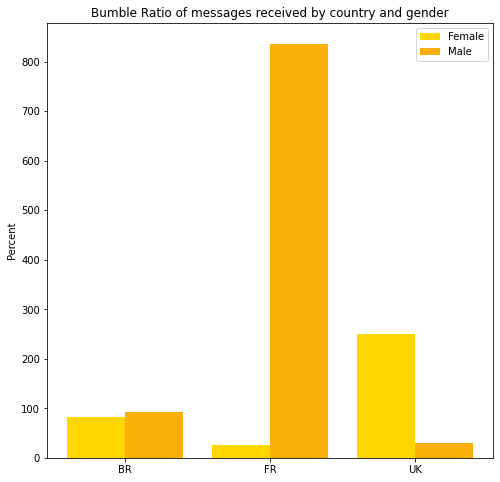

In [75]:
# Plotting the data on a chart
c=3
# Converting Ration to percent
female_ratio = list(bumble_df[bumble_df["gender"] == "F"].messages_ratio)
male_ratio = list(bumble_df[bumble_df["gender"] == "M"].messages_ratio)

country = np.arange(c) 
width = 0.4 #width of bars
fig = plt.figure(figsize = (8, 8))

ax = fig.add_subplot()
bar_1 = ax.bar(country, female_ratio, width, color = 'gold', label = 'Female')
bar_2 = ax.bar(country + width, male_ratio, width, color = '#F9B007', label = 'Male')

ax.set_ylabel('Percent')
ax.set_xticks(country + width / 2)
ax.set_xticklabels(['BR', 'FR', 'UK'])
ax.legend((bar_1, bar_2), ('Female', 'Male'), loc = 'upper right')
ax.set_title('Bumble Ratio of messages received by country and gender')

In [85]:
import plotly.express as px
fig = px.bar(bumble_df, x="country", y="messages_ratio", 
            color_discrete_map = {"F":'gold',"M":'#F9B007'}, 
            barmode ="group", color="gender", 
            title="Bumble Ratio of messages received by country and gender")
fig.show()